In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

In [33]:
df= pd.read_csv("COVIDCASES only.csv", index_col='Date', parse_dates=True)
df

,COVIDCASES
Date,
2020-01-29,398
2020-01-30,412
2020-01-31,432
2020-02-01,460
2020-02-02,477
...,...
2021-06-30,1747
2021-07-01,1675
2021-07-02,1663


In [34]:
df.head()

,COVIDCASES
Date,
2020-01-29,398
2020-01-30,412
2020-01-31,432
2020-02-01,460
2020-02-02,477


In [35]:
df.isnull().sum()

COVIDCASES    0
dtype: int64

<AxesSubplot:xlabel='Date'>

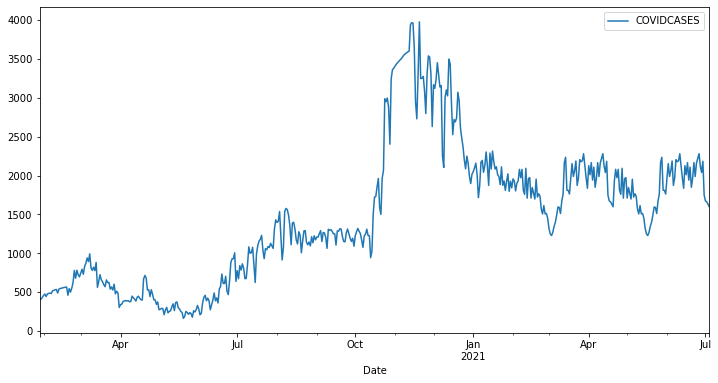

In [36]:
df.plot(figsize=(12,6))

In [37]:
UAECOVID=df[["COVIDCASES"]]
UAECOVID.shape

(523, 1)

In [38]:
scalarUAECOVID=MinMaxScaler()
scalarUAECOVID.fit(UAECOVID)
normalizedUAECOVID=scalarUAECOVID.transform(UAECOVID)
print(len(normalizedUAECOVID))


523


In [39]:
n_input=10
n_output=1
generator=TimeseriesGenerator(normalizedUAECOVID,normalizedUAECOVID,length=n_input,batch_size=1)
print(len(generator))

513


In [40]:
data=[]
target=[]

for i in range(len(generator)):
    data1,target1=generator[i]
    data.append(data1[0])
    xx=float(target1[0])
    target.append(xx)
data=np.array(data)
target=np.array(target)
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=4)
print(data.size)
print(x_test.size)

5130
1030


In [41]:
model=Sequential()
model.add(LSTM((1),batch_input_shape=(None,10,1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [42]:
history=model.fit(x_train,y_train,epochs=400,validation_data=(x_test,y_test))

Epoch 1/400
13/13 [==============================] - 2s 42ms/step - loss: 0.2083 - accuracy: 0.0000e+00 - val_loss: 0.1979 - val_accuracy: 0.0097
Epoch 2/400
13/13 [==============================] - 0s 5ms/step - loss: 0.1889 - accuracy: 0.0000e+00 - val_loss: 0.1886 - val_accuracy: 0.0097
Epoch 3/400
13/13 [==============================] - 0s 5ms/step - loss: 0.1957 - accuracy: 0.0000e+00 - val_loss: 0.1803 - val_accuracy: 0.0097
Epoch 4/400
13/13 [==============================] - 0s 5ms/step - loss: 0.1838 - accuracy: 0.0000e+00 - val_loss: 0.1733 - val_accuracy: 0.0097
Epoch 5/400
13/13 [==============================] - 0s 5ms/step - loss: 0.1712 - accuracy: 0.0000e+00 - val_loss: 0.1671 - val_accuracy: 0.0097
Epoch 6/400
13/13 [==============================] - 0s 5ms/step - loss: 0.1558 - accuracy: 0.0000e+00 - val_loss: 0.1618 - val_accuracy: 0.0097
Epoch 7/400
13/13 [==============================] - 0s 5ms/step - loss: 0.1639 - accuracy: 0.0000e+00 - val_loss: 0.1571 - val_a

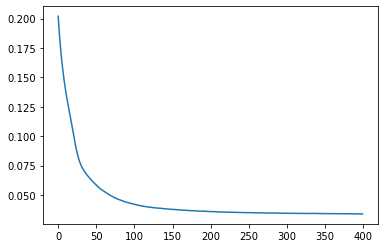

In [43]:
plt.plot(history.history['loss'])
plt.show()

In [44]:
results=model.predict(x_test)
print(len(results))



103


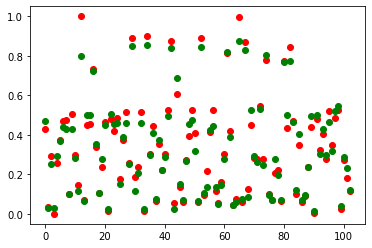

In [45]:
plt.scatter(range(len(y_test)),y_test,c='r')
plt.scatter(range(len(results)),results,c='g')
plt.show()

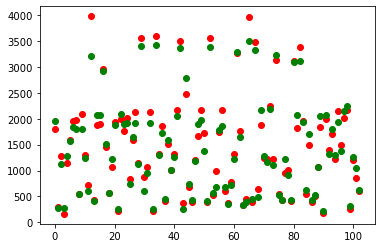

In [47]:
resultsNotscaled=scalarUAECOVID.inverse_transform(results)
y_test2=y_test.reshape(-1,1)
targetNotscaled=scalarUAECOVID.inverse_transform(y_test2)
type(results)
type(y_test)
plt.scatter(range(len(targetNotscaled)),targetNotscaled,c='r')
plt.scatter(range(len(resultsNotscaled)),resultsNotscaled,c='g')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(resultsNotscaled,targetNotscaled))
print(rmse)

162.54169284999196
